 ## INTRODUCTION:- 
 
 Access to clean drinking water is a basic necessity of livelihood. In this era of maximised green house effect which lead us towards the harsh reality of climate change, 'clean and fresh drinking water for all' became a challenging phenomena. Almost every state is impacted by the serious problem of water quality. Only three percent of the water on Earth is freshwater. The remaining portion is either frozen as ice caps, glaciers, and permafrost, or buried deep into the earth. Only 1.2% of it may be used as drinking water. By using a data-driven method to evaluate those features, we may be able to gain a better understanding of the factors that affect water quality. Water safety has a fundamental relation to the potability of the water. That feature can be analyzed using data techniques.
 
 In this project we'll deal with a small dataset of water quality. To find hidden insights in the data, we are going to use data analysis techniques with pandas and numpy. The libraries seaborn and matplotlib will be used to visualize the data. A range of exploratory data analysis techniques will be applied in order to provide more clarification regarding the quality of the data.



 ## DATASET:-

 For this project we have used a dataset from kaggel. A jupyter notebook instances with python code was used for this instances.

 ## UNDERSTANDING THE DATA:-

 First and foremost, we must comprehend the data that we are using. The usual pandas import statement using read_csv will be utilized because the file format is a CSV file. Having imported the data, the code assigns the variable df with the DataFrame output results from the pandas method. 
 
 It may be essential to display a DataFrame's memory, especially when memory limitations are present. One scenario would be if the dataset that needs to be imported is bigger than the amount of memory that the Python session has available. 
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree

In [4]:
df = pd.read_csv('water_potability.csv')                                                  ## Importing the dataset for review as a DataFrame.

In [5]:
df.head()                                                                                         ## Reviewing the first five observations.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## <>

 "df.info()" code can be used to display the output. The Python interpreter must proceed in order to understand the memory consumption displayed below when the keyword memory_usage is used. A variety of information can be displayed, including the names of the columns and the sorts of data they include, as well as the variables class and the number of non-null values. As we can see, the full table has 3,276 rows. Nevertheless, there are only 2,495 non-null values in the column 'Sulfate'. In order to determine whether there is a trend for these missing entries with other columns, a number of missing values can be examined. Afterward we went over a data visualization method that can be useful for identifying patterns. If the default parameters were not what was expected, we might have changed the datatype of a column by following the previous import statement. The aforementioned findings show that the float datatype is applied to decimal numbers, displaying the entire number as integers. Additionally, in order to give the complete coverage of possible input values, the biggest memory type has been included for these numerical columns. We should frequently evaluate whether these datatypes are holding the correct range of values. If a narrower range is anticipated in the future, a smaller memory value may be assigned. By using this reasoning, processing performance would be improved and the DataFrame's memory efficiency would rise.
 
 One element shown by the info function above that may be analyzed in a number of ways is the DataFrame's structure. With the aid of such metadata, programmers might be able to investigate basic components of the number of rows and columns. In Python, calling a shape attribute does not require parenthesis. An attribute is a data result that may be accessed by both a class and its object. As we have reviewed, a method is a function that is a member of a class. To learn more about the specifics, a detailed analysis of the inner workings of Python class statements would be required'.
 

In [6]:
df.describe()                                                ## Transposing the summary details - easier to review larger number of features.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


 ## SUMMERY STATISTICS :-

 Here, we start looking over the DataFrame columns summary details. The numeric columns can be subjected to high-level data analysis using a straightforward describe approach. Since there are just numeric columns in our DataFrame, all of the summary attributes are generated. To display useful outputs when there is a combination of character and numeric columns, additional keyword arguments need to be included.The default summary values for each column are displayed by "df.describe()". The count of non-null values can be deduced from the count values. Any sum that is less than the total number of rows in the DataFrame displaying blank values in the columns. There is a range of values visible for every variable. To comprehend the i) Mean, ii) Variance, iii) Skewness, and iv) Kurtosis, we may apply the four methods of moments.

In [8]:
df.shape

(3276, 10)

In [9]:
pd.set_option('display.max_columns',10)

In [10]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## <>

 It is also crucial to have the external knowledge required to understand feature qualities when looking at summary details. We know from experience that the optimal pH range is between 0 and 14, where 7 and below indicates acidic nature and more than 7 indicayes the basic nature. If a value was outside of this range, the feature values would need to be looked at and corrected. In the statistics used to assess the water quality, it is preferable for the neutral qualities to have an average and median (represented by the 50th percentile) near to 7.

 If there are many features in the DataFrame, it could be difficult to understand the outcome of the previous code block. It is possible for the output to be more horizontally dispersed than what can be viewed on a screen without scrolling.
 
 Applying the procedure of transposing the result is helpful. Output was generated by chaining the describe method within the code block above. With the summary metrics shown as column headers, it is now much simpler for the user to check the column names provided on the row index. With more columns, this tiny change to the describe method performs incredibly well.
 
 We will benefit from reviewing the positional parameter values and default keyword for each method that uses this technique.
 Results: The Jupyter console displays information about the method parameters and docstring. By examining the output, the user can investigate the inner workings of the procedure. The process may be used more easily thanks to the definitions and range of default values for each parameter. There are several Jupyter functions that can help increase a programmer's output.

## DEPENDENT VARIABLE ANALYSIS

In [11]:
d = pd.DataFrame(df['Potability'].value_counts())

In [12]:
d

,count
Potability,
0,1998
1,1278


In [39]:
df.isnull().sum()                                                                             ##Checking for the missing values by column.

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

 ## MISSING VALUES
 
 As discussed earlier from the metadata and summary statistics there are a number of missing values within the DataFrame. To confirm if this is correct we can apply the code block below.
 
 As was previously mentioned based on the metadata and summary statistics, the DataFrame has a number of missing values. We can use the code block below to verify whether this is correct.
 
 

In [40]:
def isnull_prop(df):                                                                             ##Proportion of missing values by column.
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

## <>
 
 To determine how many missing values there are in each column, the code combined the first null method with the total method. The 'isnull' evaluation will check a column for values that are not null. The count is done using the sum method. It is evident from the output that three columns have missing values. As having the overall amount of rows with missing values is an excellent starting point. Reviewing the percentage of missing values in a column would be preferable, though.
 
 The pandas DataFrame methods application of the dictionary variable will simplify comprehension of the variations for each column. This encompasses the outputs miss_percent column. Since the proportion of missing values is now within the range we had predicted, we may apply a threshold value to decide whether or not to use the column. If a column's value is abnormally high—for example, its sulfate value exceeds 20%—a user-defined control could be put in place to alert users to the need for a closer look at the column or to remove it from use going forward.           
 


In [41]:
null_dict = isnull_prop(df)                                                                            ##Appling the missing value method.
print(null_dict.items())

dict_items([('ph', [0, 0.0]), ('Hardness', [0, 0.0]), ('Solids', [0, 0.0]), ('Chloramines', [0, 0.0]), ('Sulfate', [0, 0.0]), ('Conductivity', [0, 0.0]), ('Organic_carbon', [0, 0.0]), ('Trihalomethanes', [0, 0.0]), ('Turbidity', [0, 0.0]), ('Potability', [0, 0.0])])


In [42]:
df_missing = pd.DataFrame.from_dict(null_dict,                                     ##Creating a dataframe of the missing value information.
                                    orient="index", 
                                    columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
ph,0,0.0
Hardness,0,0.0
Solids,0,0.0
Chloramines,0,0.0
Sulfate,0,0.0
Conductivity,0,0.0
Organic_carbon,0,0.0
Trihalomethanes,0,0.0
Turbidity,0,0.0
Potability,0,0.0


## <>
 
 There's also the option to use the heatmap function in the Seaborn data visualization package to look for trends in missing numbers. Output can be obtained by utilizing the previously given code block. To ascertain whether any rows for any or all three variables have missing values, this chart offers more context. It's probable that those who were adding data to the original dataset were frequently displaying missing numbers. With this information, we can offer data-driven insights to determine the best strategies for lowering the percentage of missing values.
 

<Axes: >

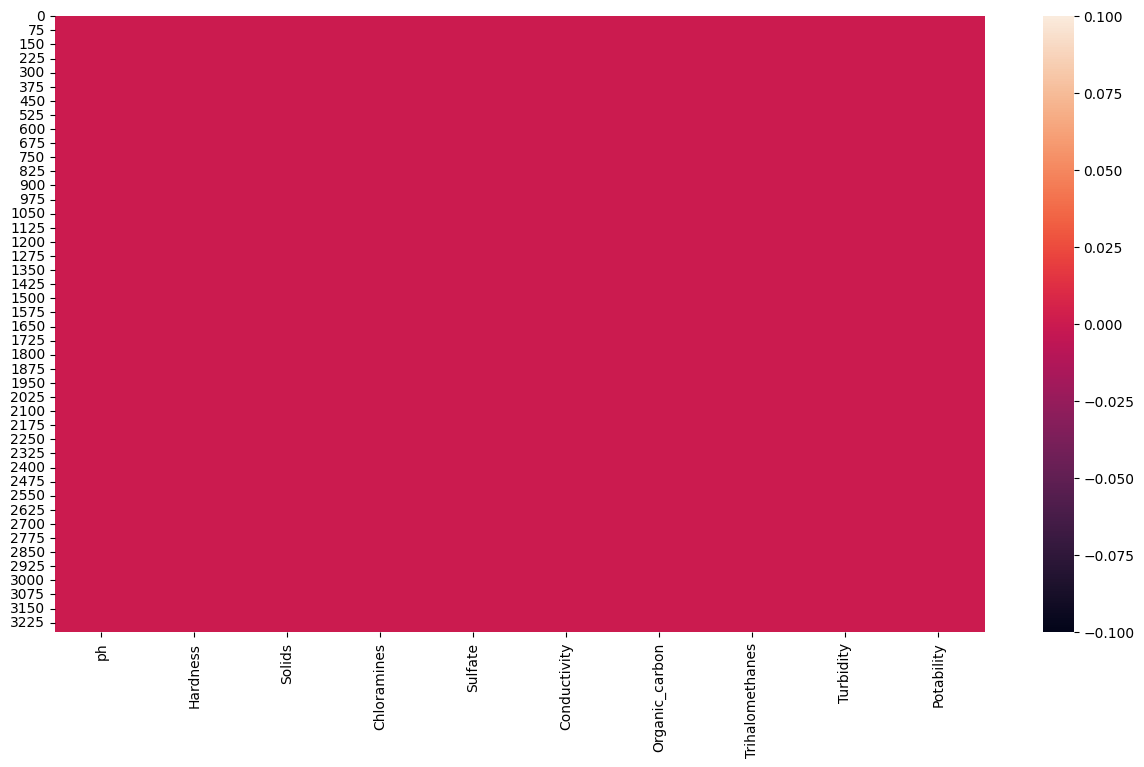

In [43]:
plt.figure(figsize=(15,8))                                             ##Displaying missing values using a heatmap to understand any patterns. 
sns.heatmap(df.isnull())

In [15]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


## MANIPULATIONS USING PYTHON PANDAS:-

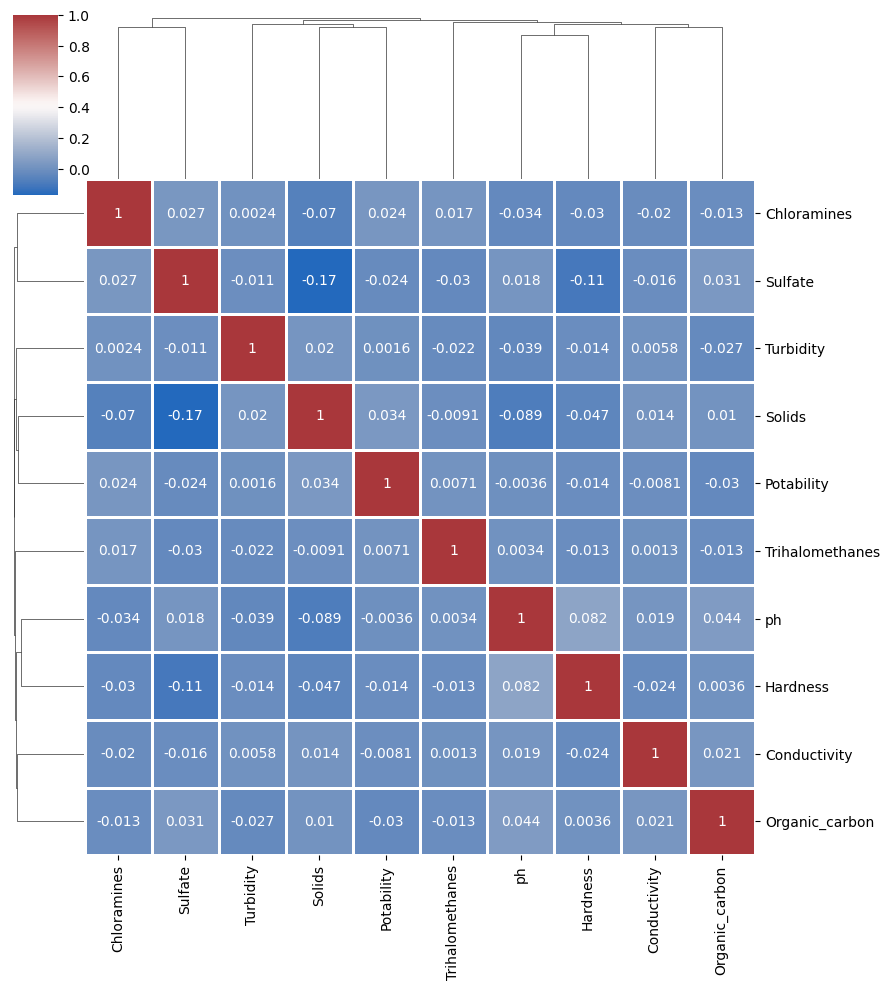

In [16]:
sns.clustermap(df.corr(), cmap = 'vlag', dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()
                                                                   ##

## <>

 The provided code generates a clustered heatmap of a DataFrame 'df's correlation matrix using the 'sns.clustermap' function from the Seaborn library. 
 
 df.corr():- calculates the DataFrame df's correlation matrix. The pairwise correlation coefficients between the DataFrame's numerical columns are contained in this matrix.

 sns.clustermap(...):- Uses Seaborn to produce a clustered heatmap.

 cmap='vlag':- This sets the color map to Seaborn's diverging colormap, 'vlag'.

 The dendrogram_ratio=(0.1, 0.2) parameter indicates the proportion between the heights of the column and row dendrograms. The height of the row dendrogram is represented by the first number (0.1), and the height of the column dendrogram by the second value (0.2).

 annot=True:- Shows the correlation coefficients in every heatmap cell.

 linewidths=.8:- Modifies the linewidth of the heatmap's cell borders.
 
figsize=(9, 10-): Defines the dimensions of the final figure as 10 inches in height and 9 inches in width. 

The generated heatmap is shown using plt.show( ).

Thie will dsisplay a clustered heatmap that shows the DataFrame's correlation matrix. The rows and columns are grouped according to how similar they are in terms of correlation, with the color intensity signifying the correlation's strength and direction. The grouping of the rows and columns is displayed in the dendrograms on the sides. The correlation coefficients are shown by the annotated values inside the cells.




In [17]:
non_potable = df.query('Potability == 0')
potable = df.query('Potability == 1')

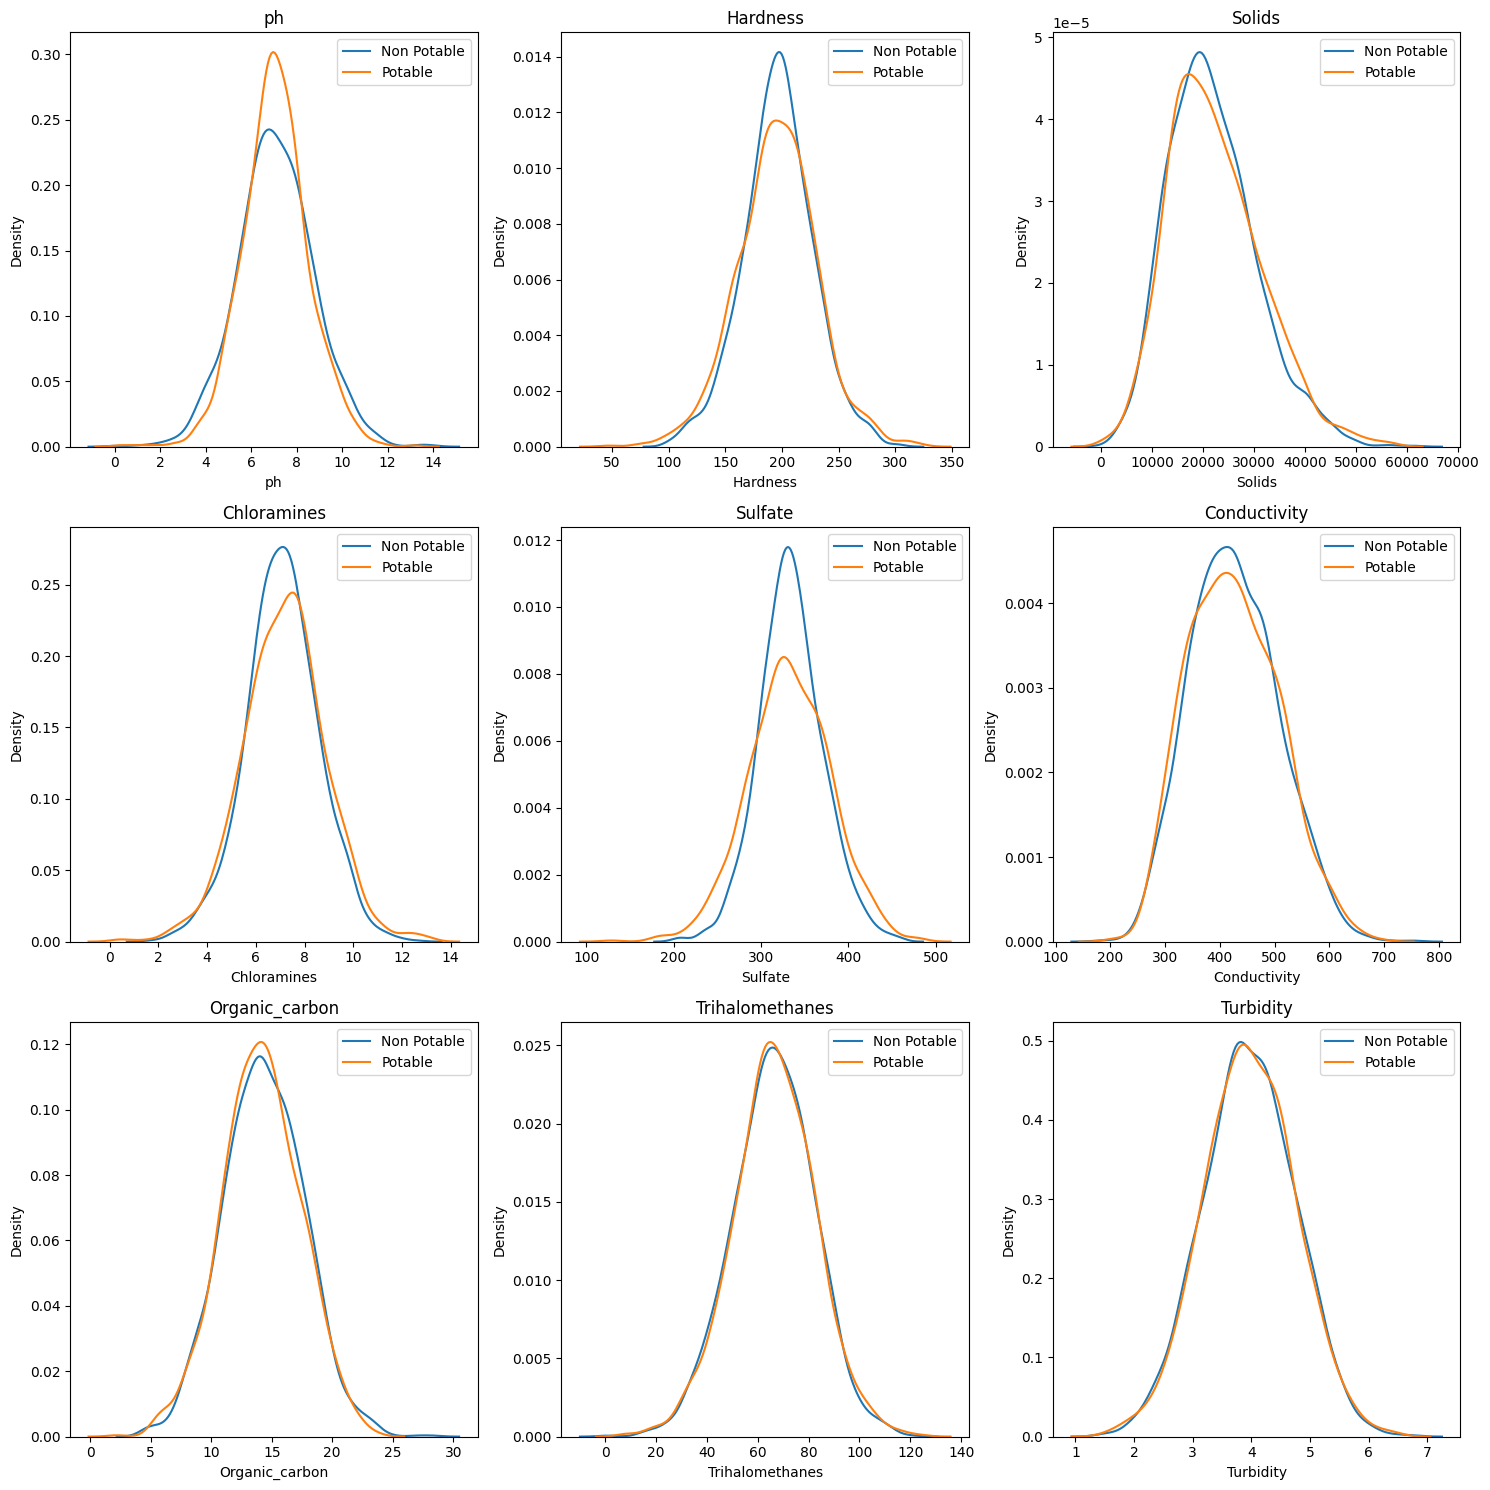

In [18]:
plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
    plt.tight_layout()

## <>

 The given code is creating a 3x3 grid of subplots using matplotlib and seaborn to plot Kernel Density Estimation (KDE) plots for two sets of data ('non_potable' and 'potable') on each subplot. The data is assumed to be stored in a DataFrame 'df', and the loop iterates over the first 9 columns of the DataFrame.

 The distributions of the designated columns between the "Non Potable" and "Potable" datasets can be graphically compared with the help of this code. The estimated probability density function for each dataset is displayed in the KDE plots, which provide a glimpse of the underlying data distribution. The legend helps identify which plot corresponds to each dataset.
 

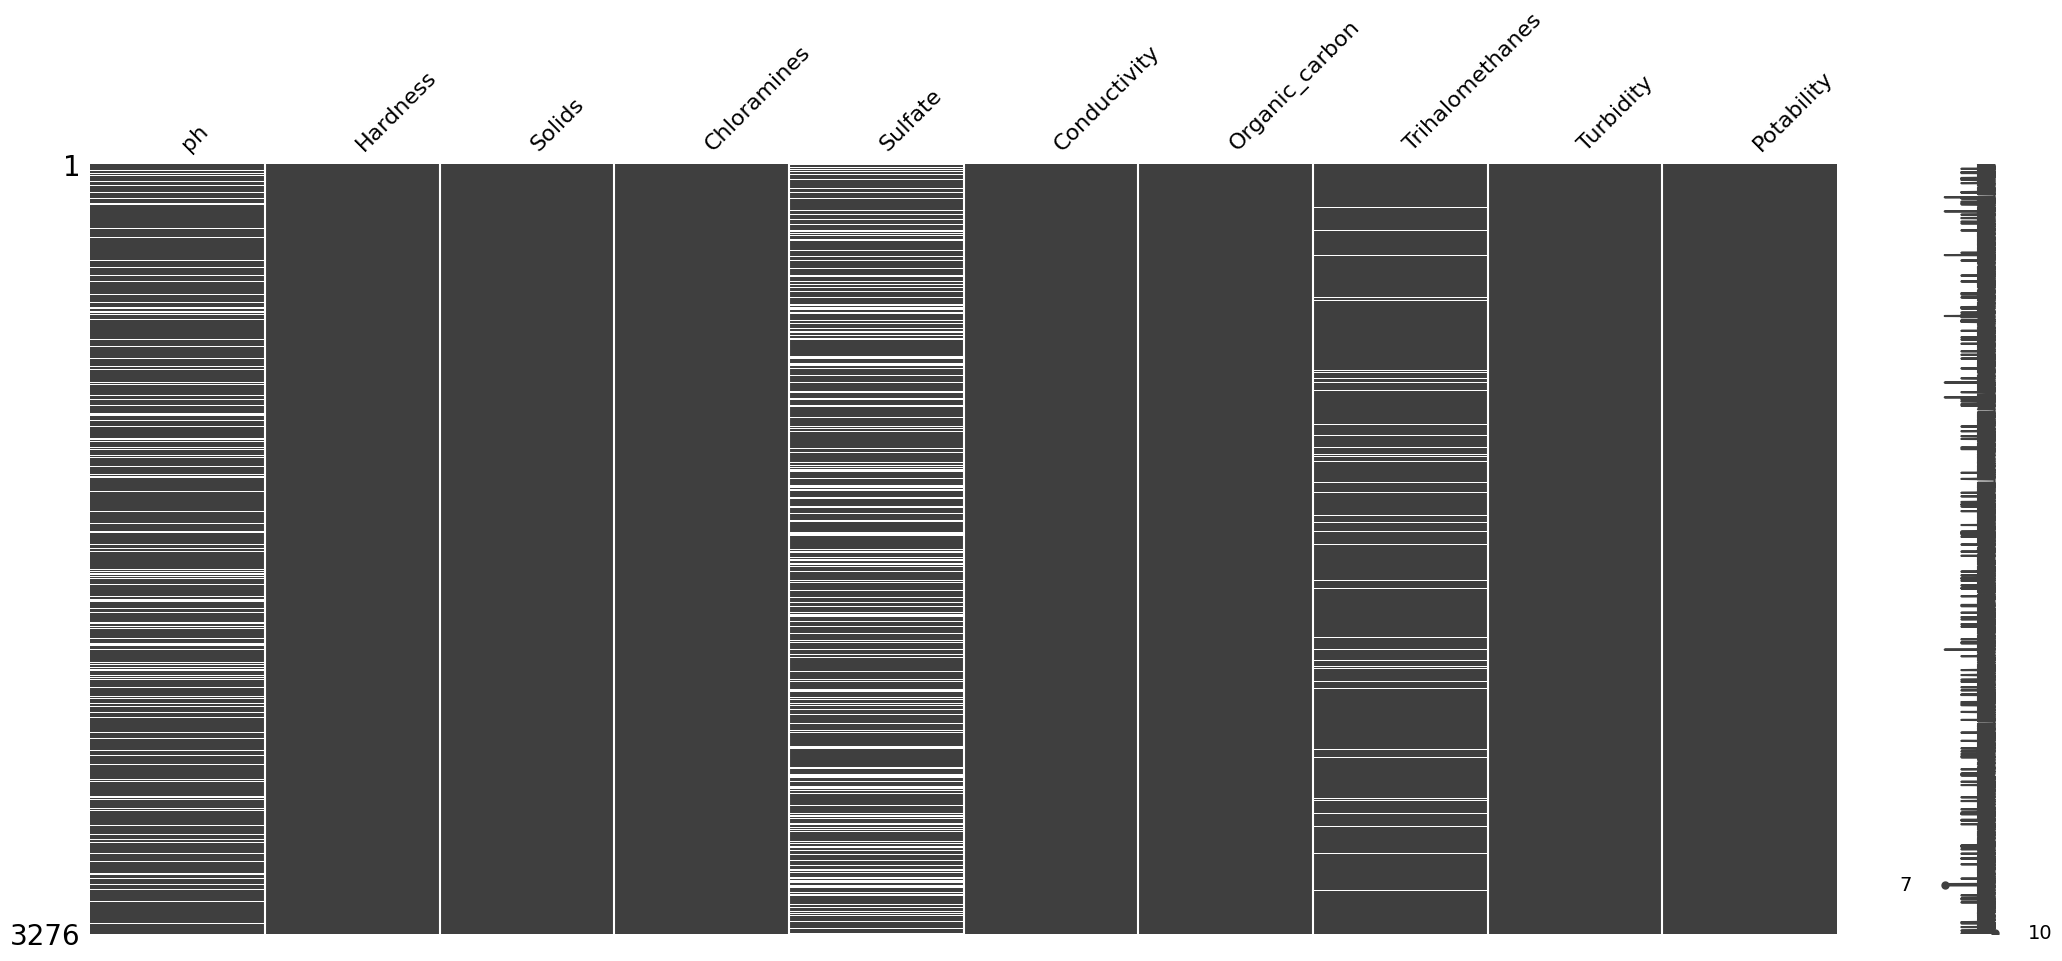

In [19]:
msno.matrix(df)
plt.show()

## <>

 This code creates a matrix plot that shows missing values in a DataFrame df by utilizing the 'msno.matrix' function from the 'missingno' library. Below is a summary of the functions of each line:

msno.matrix(df):- This function creates a matrix graphic in which each row corresponds to a DataFrame variable (column), and each column to a dataset entry. To show if missing values are present or absent, the cells are color-coded. A white line indicates the absence of a value, and color indicates the presence of a value in the cell.

plt.show():- The show method from the matplotlib.pyplot module is used in this line to display the plot. This line is required in order to see the matrix graphic in action.


In [20]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## HANDLING MISSING VALUES WITH AVG OF FEATURES

In [21]:
df['ph'].fillna(value = df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(value = df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean(), inplace = True)

## <>

 The given code fills missing values in three columns ('ph', 'Sulfate', and 'Trihalomethanes') of a DataFrame df with the mean values of each respective column.

 df['ph'].fillna(value=df['ph'].mean(), inplace=True):- Uses the 'ph' column's mean value to fill in any missing values. When the inplace=True option is used, the DataFrame is modified directly rather than being replaced.
 
The 'Sulfate' column's mean value is used to fill in any missing values buslling df['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace=True). 

fillna(value=df['Trihalomethanes'].mean(), inplace=True) df['Trihalomethane-s']: Replaces any missing values in the "Trihalomethanes" column with the column's mean valu e.

Following the execution of this code, the corresponding mean values will be used to fill in the missing values in the designated columns. This is a standard method for dealing with missing data, in which the non-missing values in the same column are imputed with the missing values using a central tendency m. 







PREPROCESSING : TRAIN-TEST SPLIT & NORMALISATION

In [22]:
x = df.drop('Potability', axis = 1).values
y = df['Potability'].values


## TRAIN TEST SPLIT

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3, random_state = 3)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (2293, 9)
x_test (983, 9)
y_train (2293,)
y_test (983,)


## <>

 'train_test_split(x, y, test_size=0.3, random_state=3)':- Splits the features (x) and labels (y) into training and testing sets. The test_size=0.3 parameter indicates that 30% of the data will be used as the test set, and the remaining 70% will be the training set. The random_state=3 parameter sets a seed for the random number generator, ensuring reproducibility.

 The four variables that represent the training and testing sets for features and labels are x_train, x_test, y_train, and y_test. This process deconstructs the output of train_test_split.


## MIN-MAX NORMALIZATION

In [24]:
x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = (x_train - x_train_min)/(x_train_max - x_train_min)
x_test = (x_test - x_train_min)/(x_train_max - x_train_min)

## <>

 The provided code is performing min-max scaling on the features in x_train and x_test. Min-max scaling is a common preprocessing technique that transforms the features to a specific range (usually [0, 1]).

Here's a breakdown of each line:

x_train_max = np.max(x_train):- Computes the maximum value in the training set (x_train).

x_train_min = np.min(x_train):- Computes the minimum value in the training set (x_train).

x_train = (x_train - x_train_min)/(x_train_max - x_train_min):- Scales the values in the training set to the range [0, 1] using the min-max scaling formula. It subtracts the minimum value and divides by the range (difference between maximum and minimum values).

x_test = (x_test - x_train_min)/(x_train_max - x_train_min):- Scales the values in the test set (x_test) using the same min-max scaling parameters calculated from the training set.

After running this code, the features in both x_train and x_test will be scaled to the range [0, 1] based on the minimum and maximum values of the training set. Min-max scaling is often applied to ensure that all features contribute equally to the model, especially when using algorithms sensitive to the scale of input features, such as gradient-based optimization algorithms in machine learning models.

MODELLING DECISION TREE AND RANDOM FOREST CLASSIFIER

In [25]:
models = [('DTC', DecisionTreeClassifier(max_depth=3)),
          ('RF', RandomForestClassifier())]

In [26]:
final_results = []
cmlist = []
for name, model in models:
    model.fit(x_train, y_train)
    model_result = model.predict(x_test)
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    final_results.append((name, score))
    cmlist.append((name, cm))
final_results

[('DTC', 0.5652173913043478), ('RF', 0.6179245283018868)]

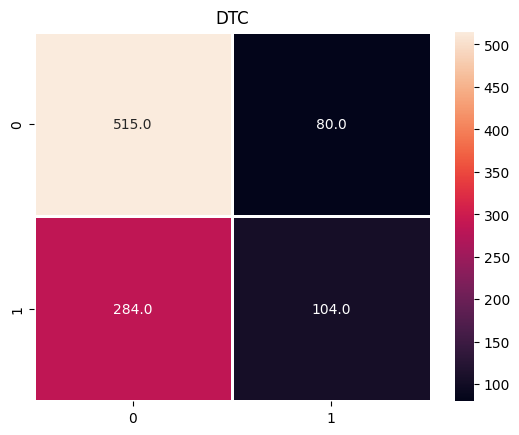

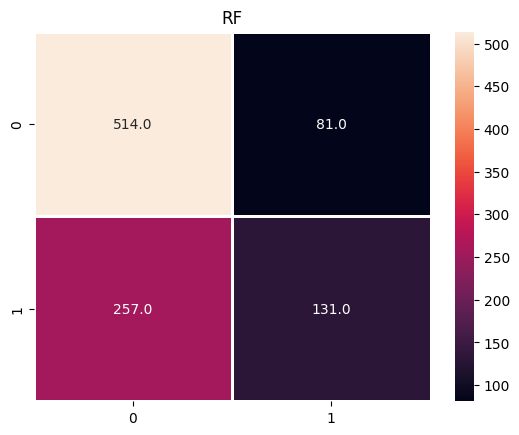

In [27]:
for name, i in cmlist:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = '.1f')
    plt.title(name)
    plt.show()

## VISUALISING DECISION TREE

D has 9 tupples labeled 'yes' and 5 labeled 'no',

   gini(D) = 1 - (9/14)^2 - (5/14)^2 
           = 0.459

In [46]:
dt_clf = model.estimators_[0]

In [47]:
dt_clf

DecisionTreeClassifier(max_features='sqrt', random_state=664214625)

In [30]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

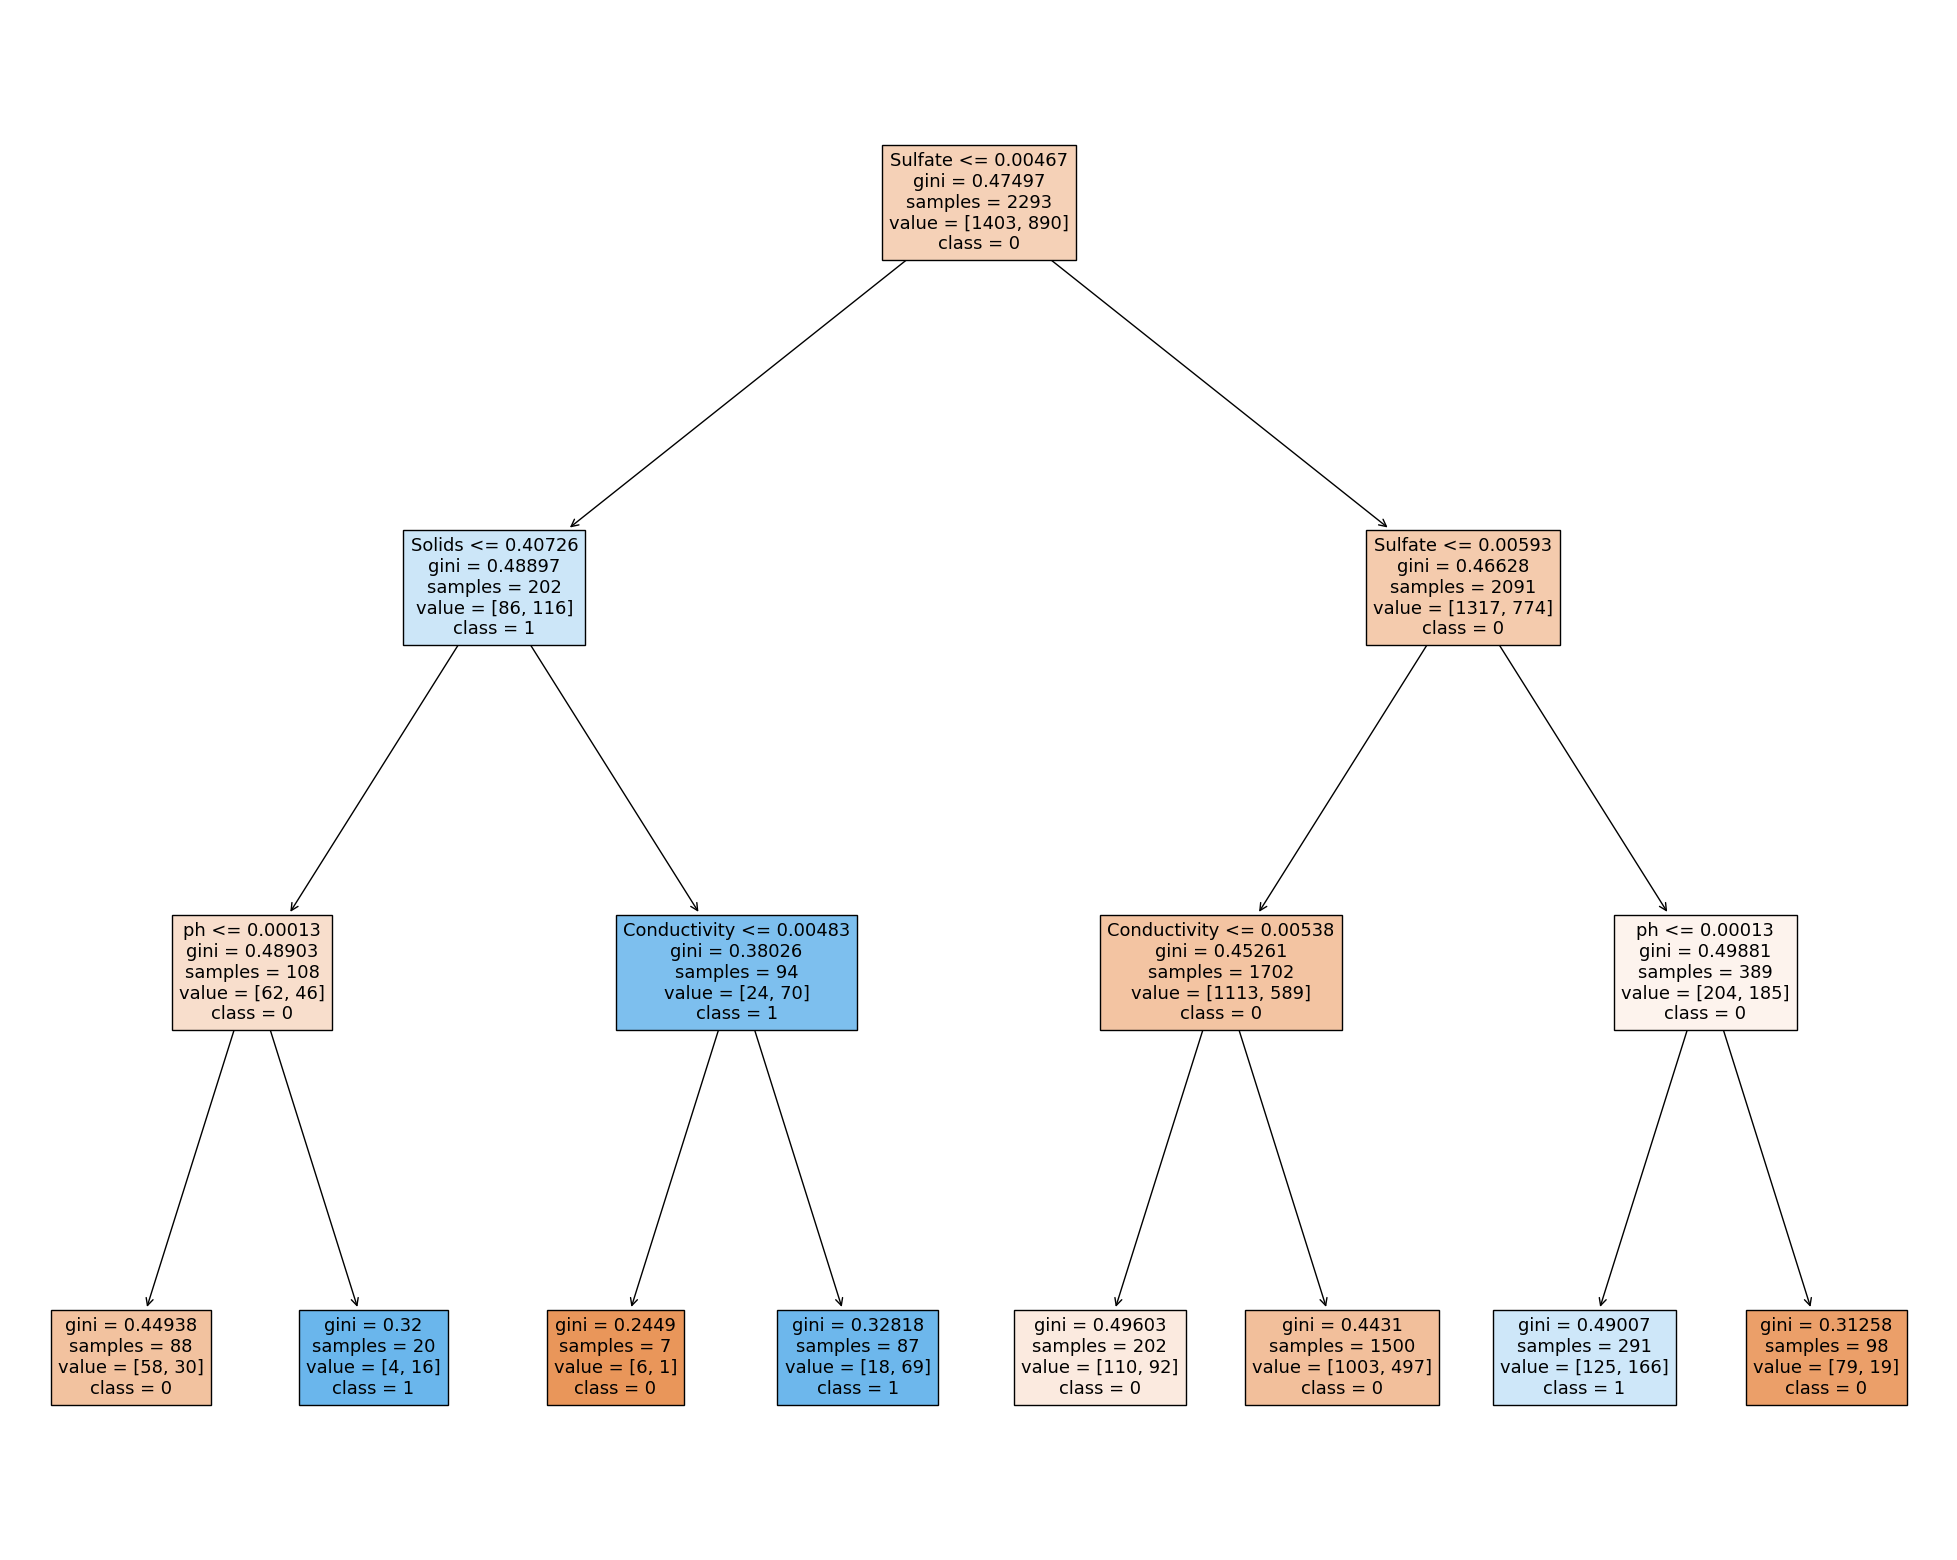

In [31]:
plt.figure(figsize=(25, 20))
tree.plot_tree(dt_clf,
               feature_names=df.columns.tolist()[:-1],
               class_names=['0', '1'],
               filled=True,
               precision=5)
plt.show()

In [32]:
model_params = {'Random Forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100],
                                                                                'max_features': ['auto','sqrt','log2'],
                                                                                'max_depth': list(range(1,21,3))}}}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [33]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params['model'], params['params'], cv = cv, n_iter = 10)
    rs.fit(x,y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])
scores

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", 

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 13},
  0.6726210202941724]]

In [34]:
scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 13},
  0.6726210202941724]]

 ## Understanding the pH variable distribution:-
 
 One final assessment would be a review of a variable about which we have prior external knowledge. Using the Seaborn library, we could make a pH variable histogram.
 
 Similar to how we did with the print statement before, we can use the f string statement to add the mean, median, minimum, and maximum values to make reviewing the distribution easier.
 

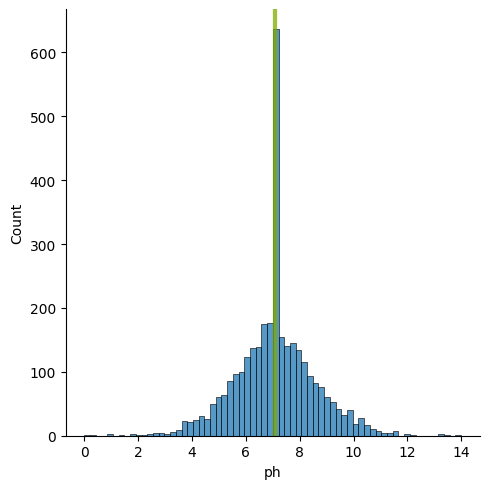

In [44]:
sns.displot(df["ph"], kde=False)                                                             ### setting the histogram, mean and median
plt.axvline(x=df.ph.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.ph.median(), linewidth=3, color='y', label="median", alpha=0.5)

## <>

 Findings with a histogram to examine the pH variable's distribution,

 The output indicates that the majority of pH values are close to the middle. With a distribution similar to a normal distribution, which is a significant insight.
 

Mean pH value 7.080794504276836         
 Median pH value 7.080794504276835         
 Min pH value 0.0         
 Max pH value 13.999999999999998


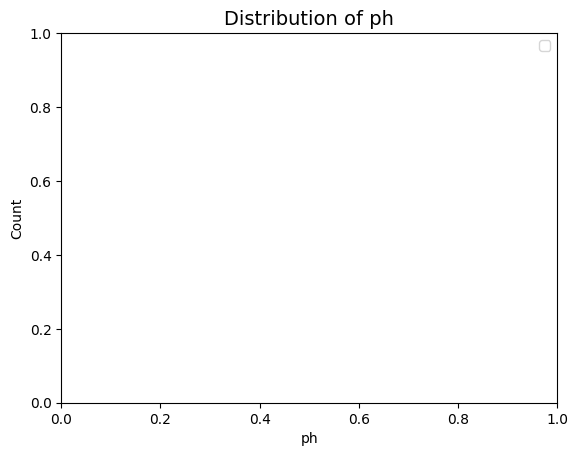

In [36]:
plt.xlabel("ph")                              ## setting title, legends and labels
plt.ylabel("Count")
plt.title("Distribution of ph", size=14)
plt.legend(["mean", "median"]);

print(f'Mean pH value {df.ph.mean()} \
        \n Median pH value {df.ph.median()} \
        \n Min pH value {df.ph.min()} \
        \n Max pH value {df.ph.max()}')

The f string statement allows us to add the mean, median, min, and max values to make it easier to review the distribution.

 ## CONCLUSION:-
 In this piece of work, we have gone over the initial stages of an Explanatory Data Analysis evaluation. To display first results, the metadata of the imported data was analyzed. By closely examining the summary statistics, we were able to focus on the data that were missing. In the end, we could examine the pH variable's histogram to confirm that it followed external expectations, we could finally examine the variable's histogram. Through regorous python pandas manipulation, this work shows different parameters influencing water quality and it's pH level. Though in this project there are certain limitations to develop a model that predicts the water quality and this work is aimed at other direction than prediction. 